# Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, Modele linéaire

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [5]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.5436332  0.43382406 0.85155976]


In [6]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      1,
      -1,
      -1
], dtype=ctypes.c_float)

print(type(X))
print(Y)

<class 'numpy.ndarray'>
[ 1. -1. -1.]


In [7]:
X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y_plot = np.array([
      1,
      -1,
      -1
])

In [8]:
arr_size = len(X)

In [9]:
dimension = len(X[0])

In [10]:
learning_rate = ctypes.c_float(0.001)

In [11]:
epoch = 1000000

In [12]:
X_flat = X.flatten()

In [13]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [14]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [15]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [16]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.2776333  -0.22217606  0.05356035]
<class 'ctypes.wintypes.LP_c_float'>


In [17]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [18]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100* min(X_plot[:, 0]),100* max(X_plot[:, 0])) :
  for x2 in range(100*min(X_plot[:, 1]), 100*max(X_plot[:, 1])) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

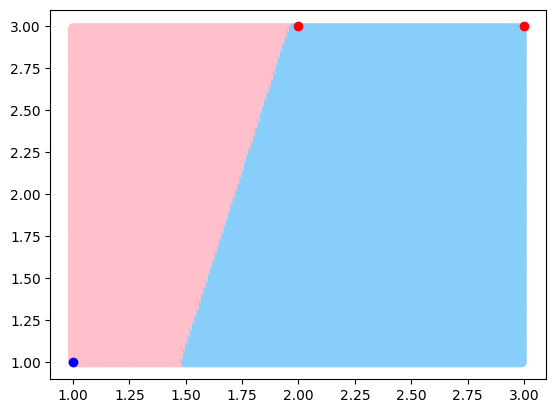

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [20]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [21]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.53846025 0.50304055 0.9873594 ]


In [22]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0], dtype=ctypes.c_float)

X_plot = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y_plot = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

In [23]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [24]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [25]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [26]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [27]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.33846042 -0.18780328  0.01817677]
<class 'ctypes.wintypes.LP_c_float'>


In [28]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [29]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100 , 300) :
  for x2 in range(100 , 300) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

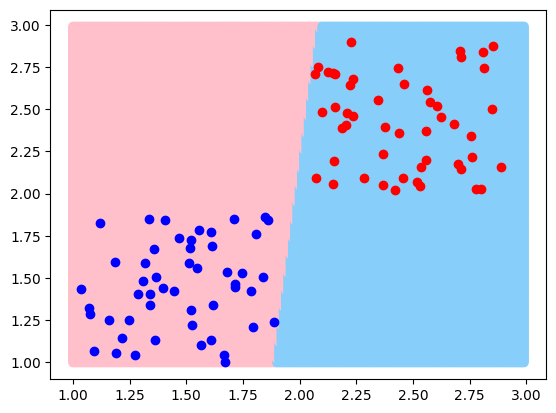

<Figure size 640x480 with 0 Axes>

In [30]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [31]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [32]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.19500172 0.7732514  0.72224975]


In [33]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype= ctypes.c_float)
Y = np.array([1, 1, -1, -1], dtype= ctypes.c_float)

X_plot = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y_plot = np.array([1, 1, -1, -1])

In [34]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [35]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [36]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [37]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [38]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[-0.00099831 -0.00074575  0.00025194]
<class 'ctypes.wintypes.LP_c_float'>


In [39]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [40]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(0 , 100) :
  for x2 in range(0 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

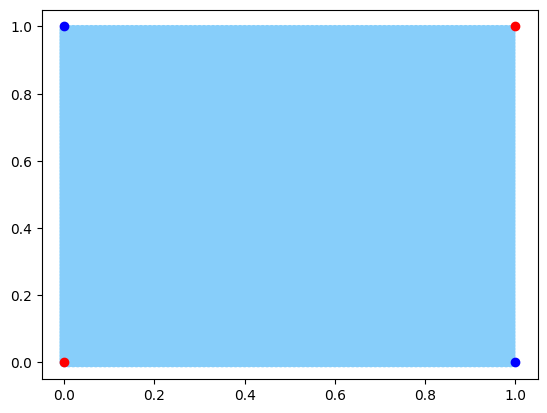

<Figure size 640x480 with 0 Axes>

In [41]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [42]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [43]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.40428054 0.42568576 0.7465776 ]


In [44]:
X = np.random.random((500, 2)) * 2.0 - 1.0
X = np.array(X, dtype= ctypes.c_float)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = np.array(Y, dtype= ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

In [45]:
print(X)
print(Y)

[[ 5.74352324e-01  2.62533158e-01]
 [ 6.86488450e-01  6.47569075e-02]
 [ 3.74567002e-01 -9.52433944e-02]
 [-2.81791061e-01 -1.69870779e-01]
 [ 5.72630882e-01  1.16239019e-01]
 [ 2.14263067e-01  2.60118674e-02]
 [ 9.81235564e-01  8.94175828e-01]
 [ 4.41912204e-01 -8.83265078e-01]
 [ 9.32047367e-02 -5.91173351e-01]
 [ 4.50968921e-01 -4.50139195e-02]
 [ 8.53874326e-01  8.46473932e-01]
 [-1.93798959e-01 -1.24618284e-01]
 [ 7.56484210e-01  6.57833338e-01]
 [ 7.28249609e-01  6.11714363e-01]
 [-5.40129662e-01  9.25964952e-01]
 [-6.13277614e-01  6.90192699e-01]
 [ 1.35734573e-01 -1.53118402e-01]
 [-5.16363941e-02 -7.69958735e-01]
 [ 5.88508785e-01 -5.09415925e-01]
 [-3.36908877e-01  8.35823417e-01]
 [-7.07216978e-01  5.21526039e-01]
 [ 5.34821630e-01  8.77148330e-01]
 [-6.53244138e-01 -2.05516517e-01]
 [ 3.01584542e-01 -7.33314514e-01]
 [ 2.41237178e-01 -1.19790830e-01]
 [-5.32517970e-01 -4.40217137e-01]
 [-5.61462402e-01  7.66528249e-02]
 [ 4.15383101e-01  6.47019506e-01]
 [-4.90240991e-01 -9

In [46]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [47]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [48]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [49]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [50]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.00028008 -0.00159314  0.00412446]
<class 'ctypes.wintypes.LP_c_float'>


In [51]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [52]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

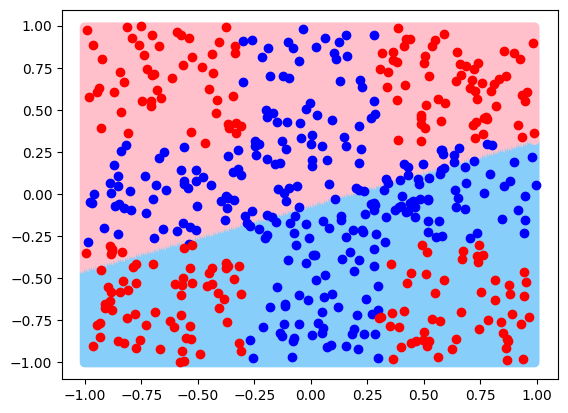

<Figure size 640x480 with 0 Axes>

In [53]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [54]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [2]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.92221963 0.07325065 0.7730154 ]


In [3]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X_plot])

X_plot = X_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]
Y_plot = Y_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]

In [4]:
print(X)

[[-0.65830046  0.49325362]
 [-0.32316357  0.369188  ]
 [ 0.9682845  -0.66753227]
 [ 0.7328385  -0.16892165]
 [-0.32976398  0.05528286]
 [ 0.6788458  -0.674251  ]
 [ 0.98073334 -0.22099482]
 [-0.44010127 -0.7497357 ]
 [ 0.7305739  -0.13536686]
 [-0.53302217 -0.7211303 ]
 [-0.77151835  0.6417255 ]
 [ 0.48888645 -0.04368049]
 [-0.6887377  -0.14310935]
 [ 0.6607649   0.7252065 ]
 [ 0.58615977 -0.3614234 ]
 [-0.30190015  0.7269409 ]
 [ 0.75136405  0.8283048 ]
 [ 0.38870364  0.6510039 ]
 [ 0.78699106  0.3652396 ]
 [-0.44821146  0.9721233 ]
 [-0.6367694  -0.6461271 ]
 [ 0.6260202   0.8308028 ]
 [ 0.8284559  -0.86640596]
 [ 0.35857567  0.03432909]
 [ 0.73011446 -0.22374825]
 [ 0.22790839  0.40727058]
 [-0.10677968  0.74144644]
 [-0.32152155  0.8539428 ]
 [-0.7893408   0.58583856]
 [ 0.960185   -0.63435394]
 [ 0.03815125  0.16122521]
 [-0.611132   -0.2892645 ]
 [-0.6832456  -0.562166  ]
 [-0.8369755  -0.94398457]
 [ 0.5131418   0.21231869]
 [-0.89203304 -0.8740545 ]
 [ 0.19056553  0.5046733 ]
 

In [6]:
print(Y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [7]:
arr_size = len(X)
dimension = 2
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [8]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [9]:
Y_flat = Y.flatten()

In [10]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [11]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [12]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.00022795 -0.00073191 -0.00019612]
<class 'ctypes.wintypes.LP_c_float'>


In [11]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [13]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

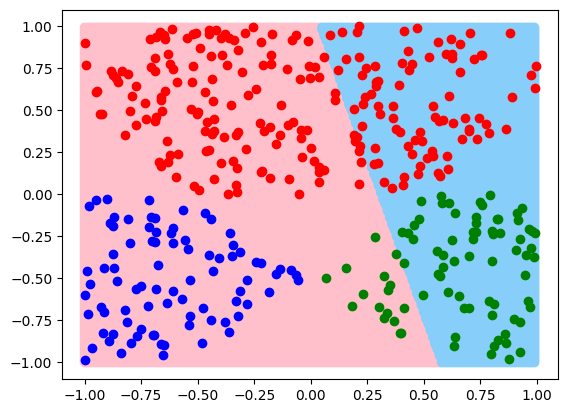

<Figure size 640x480 with 0 Axes>

In [14]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [14]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

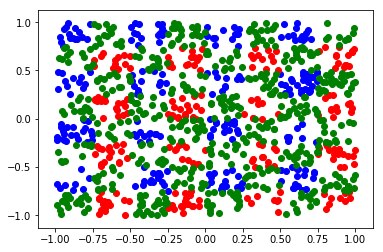

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

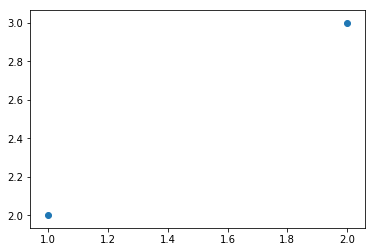

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

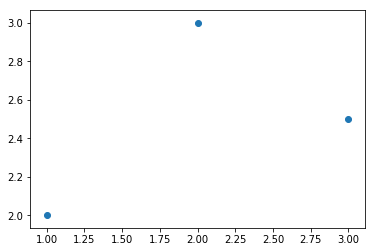

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

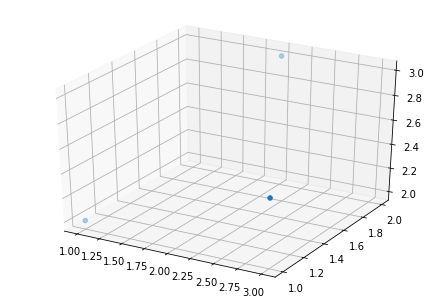

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

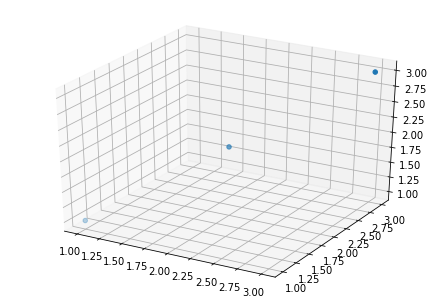

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

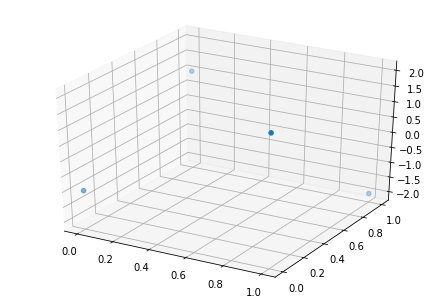

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()